In [1]:
import pandas as pd
ev_data = pd.read_csv('Electric_Vehicle_Population_Data 2.csv')
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [2]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [3]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [4]:
ev_data = ev_data.dropna()

# Let's analyze EV adoption over time - in the state of Washington

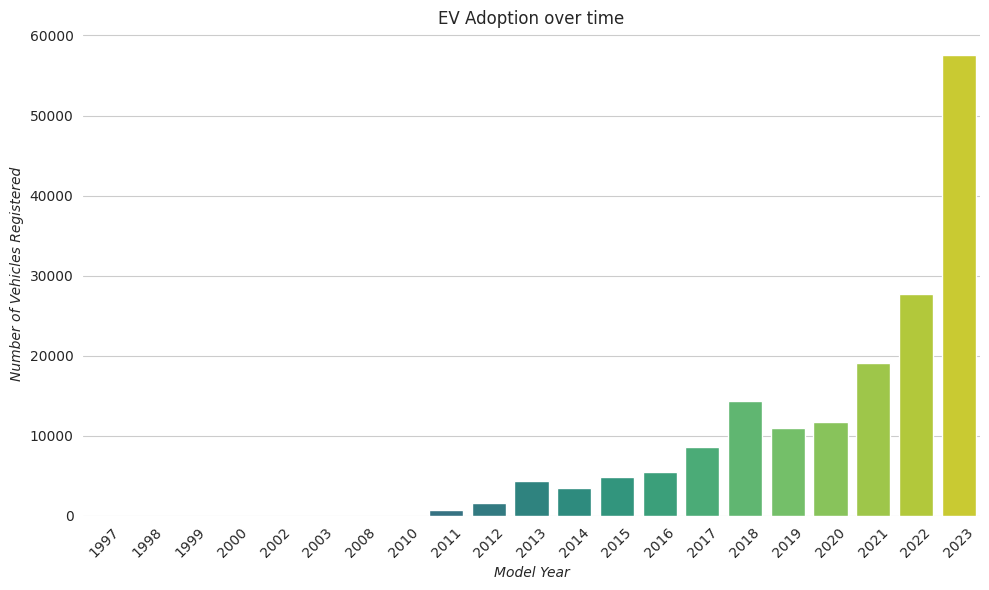

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

#EV Adoption over time

plt.figure(figsize= (10,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
ev_adoption_by_year = ev_adoption_by_year[ev_adoption_by_year.index != 2024] # Exclude 2024 from the data
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')
plt.title('EV Adoption over time')
plt.xlabel('Model Year', fontstyle='italic')
plt.ylabel('Number of Vehicles Registered', fontstyle='italic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.box(False)
plt.show()

## Electric Vehicle Adoption Trends

The bar chart reveals a compelling narrative of electric vehicle (EV) adoption over time:

### Gradual Growth Phase
From the beginning of the timeline until approximately 2016, EV registrations showed a modest but steady increase. In the early adoption phase, we can abserve EVs gaining traction but they had not yet reached mainstream popularity.

### Acceleration Period
Starting around 2017, the data indicates a notable shift in adoption rates. The number of registered EVs began to grow more rapidly, suggesting a growing public interest and improved accessibility of electric vehicles.

### Peak Adoption
The most striking feature of the chart is the dramatic surge in EV registrations for the year 2023. This bar towers above all others. The sharp increase suggests a possible tipping point where EVs have transitioned from an alternative option to a preferred choice for many consumers.

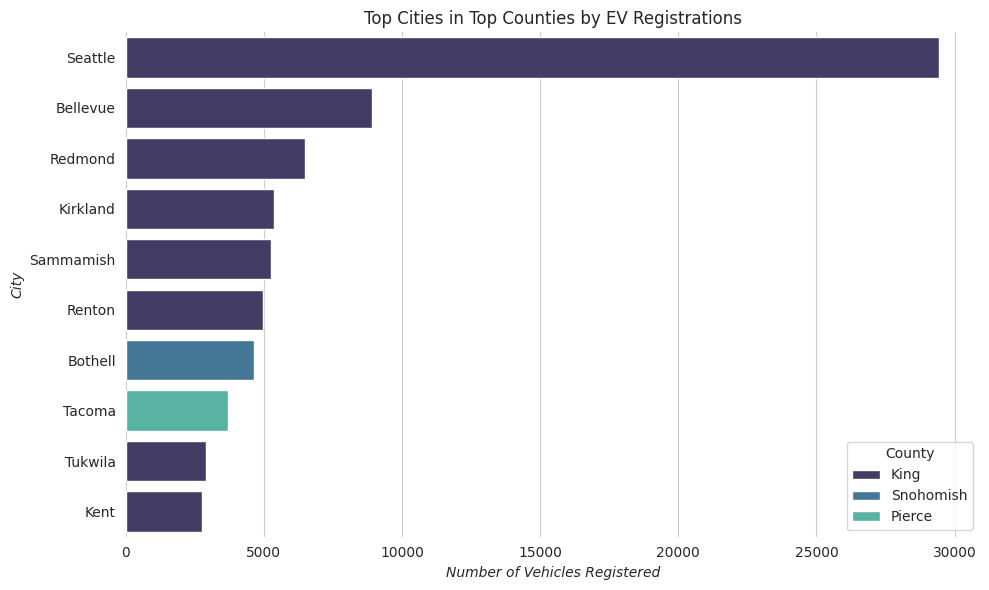

In [6]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="mako")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered', fontstyle='italic')
plt.ylabel('City', fontstyle='italic')
plt.legend(title='County')
plt.tight_layout()
plt.box(False)
plt.show()

The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. Here are the key findings from the above graph:

King County, has three of the cities with highest number of EV registrations. 

### Key Observations

- Seattle leads significantly in EV registrations.
- Bellevue and Redmond follow, but with much lower numbers.
- Kirkland and Sammamish in Snohomish County show moderate EV adoption.
- Tacoma and Tukwila in Pierce County have the lowest registrations among listed cities.
- King County dominates in EV adoption, hosting most cities with high registration numbers.

This data reveals a concentrated EV adoption pattern, with King County, particularly Seattle, at the forefront of the transition to electric vehicles.

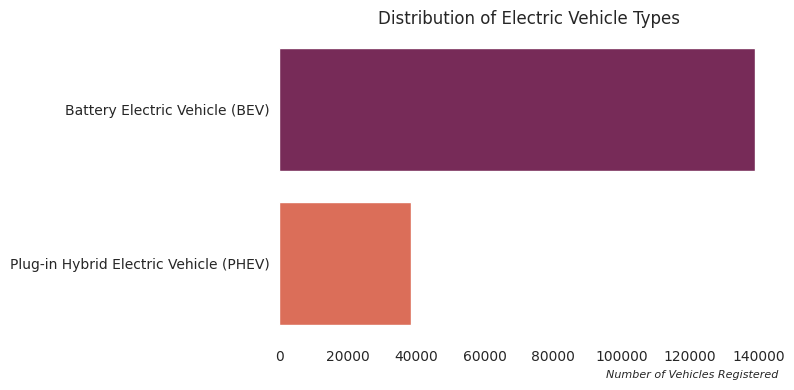

In [7]:
# analyzing the distribution of electric vehicle Types
warnings.filterwarnings("ignore")
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
sns.set_style('white')
plt.figure(figsize=(8, 4))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered', fontsize=8, fontstyle='italic', loc='right')
plt.ylabel('', fontsize=8, fontstyle='italic')
plt.tight_layout()
plt.box(False)
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered.

## Now let's identify which manufacturers and specific models dominate the EV market

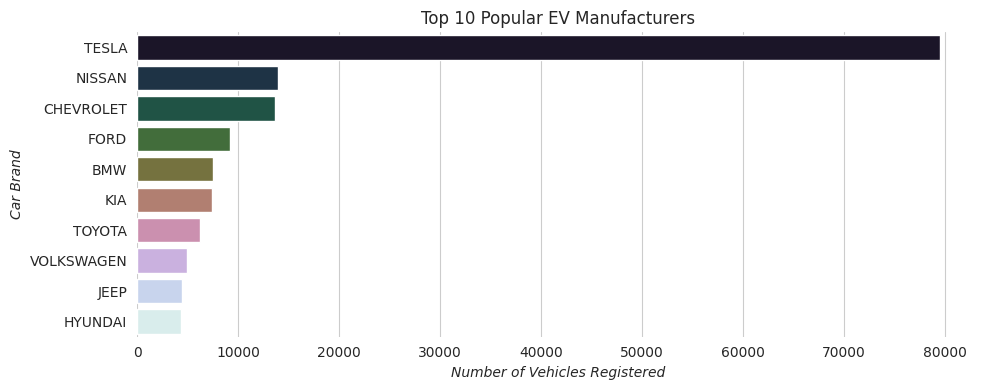

In [8]:
# analyzing the popularity of EV manufacturers
warnings.filterwarnings("ignore")
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Manufacturers')
plt.xlabel('Number of Vehicles Registered', fontstyle='italic')
plt.ylabel('Car Brand', fontstyle='italic')
plt.tight_layout()
plt.box(False)
plt.show()

The above chart indicates that:

- **TESLA** has the highest number of registered vehicles by a wide margin.
- **NISSAN** ranks second, followed by **CHEVROLET**, both with significantly fewer registrations than TESLA.
- Other manufacturers, including **FORD**, **BMW**, **KIA**, **TOYOTA**, **VOLKSWAGEN**, **JEEP**, and **HYUNDAI**, follow in descending order of registrations.

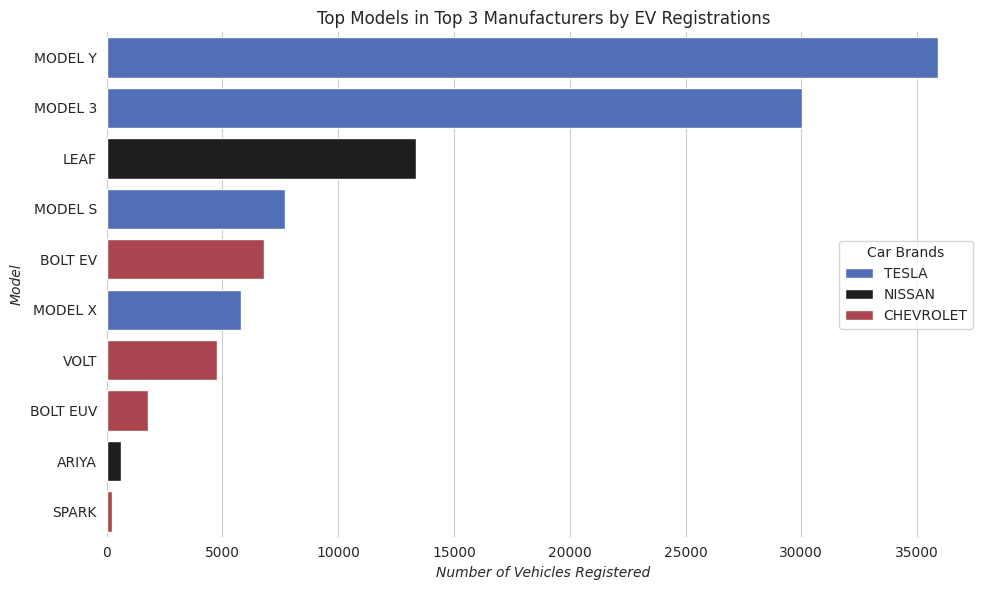

In [9]:
# top 3 manufacturers based on the number of vehicles registered
top_3_manufacturers = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_manufacturers_data = ev_data[ev_data['Make'].isin(top_3_manufacturers)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_manufacturers_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="icefire")
plt.title('Top Models in Top 3 Manufacturers by EV Registrations')
plt.xlabel('Number of Vehicles Registered', fontstyle='italic')
plt.ylabel('Model', fontstyle='italic')
plt.legend(title='Car Brands', loc='center right')
plt.tight_layout()
plt.box(False)
plt.show()

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: **TESLA**, **NISSAN**, and **CHEVROLET**. It indicates that:

- **TESLA**’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
- **NISSAN**’s LEAF is the third most registered model and the most registered non-**TESLA** vehicle.
- **TESLA**’s MODEL S and MODEL X also have a significant number of registrations.
- **CHEVROLET**’s BOLT EUV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
- **NISSAN**’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

From the top three brands : TESLA, CHEVROLET and NISSAN, let's visualize the evolution of electric ranges - min and max. 

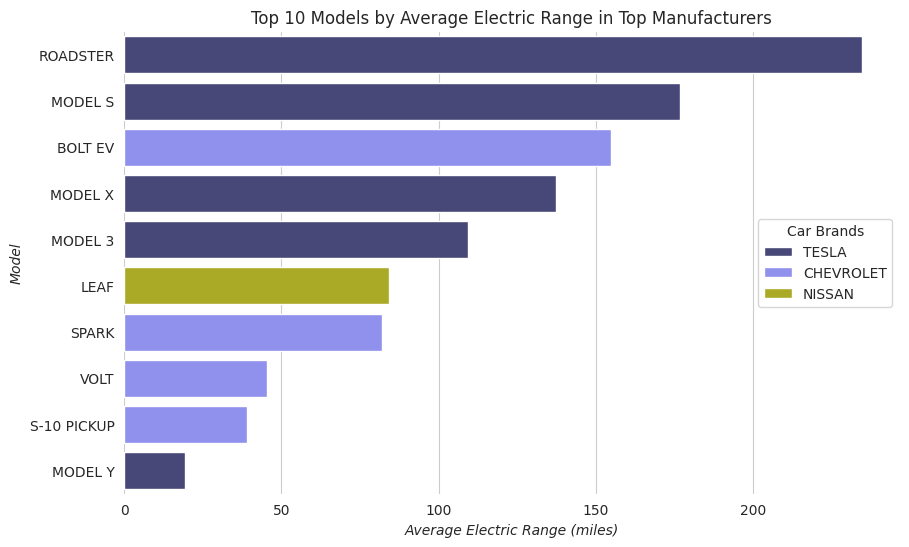

In [10]:
avg_range_by_model = top_manufacturers_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# visualize only the top 10 models with the highest average electric range
top_range_models = avg_range_by_model.head(10)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="gist_stern")
plt.title('Top 10 Models by Average Electric Range in Top Manufacturers')
plt.xlabel('Average Electric Range (miles)', fontstyle='italic')
plt.ylabel('Model', fontstyle='italic')
plt.legend(title='Car Brands', loc='center right')
plt.box(False)
plt.show()

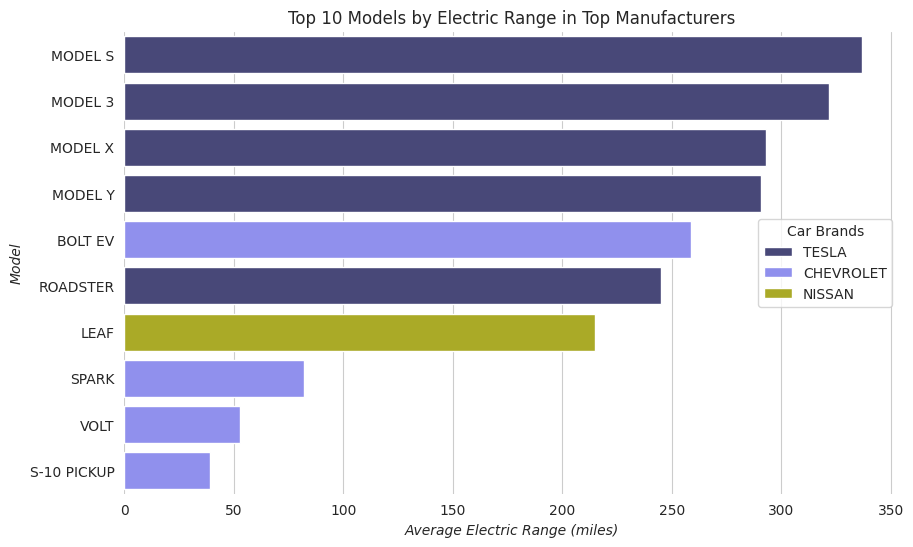

In [11]:
# remove the zero values 
top_manufacturers_data_clean = top_manufacturers_data[top_manufacturers_data['Electric Range'] != 0]

range_by_model = top_manufacturers_data_clean.groupby(['Make', 'Model'])['Electric Range'].max().sort_values(ascending=False).reset_index()

# visualize only the top 10 models with the highest average electric range
top_range_models = range_by_model.head(10)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="gist_stern")
plt.title('Top 10 Models by Electric Range in Top Manufacturers')
plt.xlabel('Average Electric Range (miles)', fontstyle='italic')
plt.ylabel('Model', fontstyle='italic')
plt.legend(title='Car Brands', loc='center right')
plt.box(False)
plt.show()

The above bar chart displays the top 10 models by average electric range across major manufacturers. We did an average because the electric range of the vehicules evolved with time.  **TESLA** dominates the list with four models, led by the MODEL Y, showcasing its leadership in electric vehicle range. The **CHEVROLET** BOLT EV stands out among **CHEVROLET** models, significantly outperforming the VOLT and S-10 PICKUP. Meanwhile, the **NISSAN** LEAF and **CHEVROLET** SPARK fall in the lower half, indicating more modest ranges compared to the top performers.

### Keynotes

Tesla models dominate the list with higher average ranges due to their consistent improvements.
The Chevrolet Bolt EV and Nissan Leaf saw significant range improvements over time, but their early models had shorter ranges.
The Chevrolet Volt is a plug-in hybrid, so its electric-only range is shorter.


In [12]:
range_data = pd.read_csv('electric_vehicle_ranges_evolution.csv')
print(range_data.head())

     Model  2008 Range (miles)  2009 Range (miles)  2010 Range (miles)  \
0  MODEL S               244.0               265.0               300.0   
1  MODEL X                 NaN                 NaN                 NaN   
2  MODEL 3                 NaN                 NaN                 NaN   
3  MODEL Y                 NaN                 NaN                 NaN   
4  BOLT EV                 NaN                 NaN                 NaN   

   2011 Range (miles)  2012 Range (miles)  2013 Range (miles)  \
0               308.0               265.0               265.0   
1                 NaN                 NaN               250.0   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN               238.0               239.0   

   2014 Range (miles)  2015 Range (miles)  2016 Range (miles)  \
0               265.0               270.0               294.0   
1               265.0             

In [13]:
# List of the vehicle models - note : excl. S-10 pickup as it is a PHEV.
vehicle_models = ['ROADSTER', 'MODEL S', 'MODEL X', 'MODEL 3', 
                  'MODEL Y', 'BOLT EV', 'LEAF', 'VOLT', 
                  'SPARK']

# Initialize an empty dictionary to store the results
max_ranges = {}

# Loop through each vehicle model
for model in vehicle_models:
    # Filter the DataFrame for the current model
    model_data = range_data[range_data['Model'] == model]
    
    # Find the maximum electric range for the current model
    max_range = model_data.iloc[:, 1:].max().max() 

    # Store the result in the dictionary
    max_ranges[model] = max_range

# Print the results with model name and maximum range
for model, max_range in max_ranges.items():
    print(f"Model: {model}, Maximum Electric Range: {max_range} miles")


Model: ROADSTER, Maximum Electric Range: 245.0 miles
Model: MODEL S, Maximum Electric Range: 405.0 miles
Model: MODEL X, Maximum Electric Range: 360.0 miles
Model: MODEL 3, Maximum Electric Range: 358.0 miles
Model: MODEL Y, Maximum Electric Range: 330.0 miles
Model: BOLT EV, Maximum Electric Range: 259.0 miles
Model: LEAF, Maximum Electric Range: 226.0 miles
Model: VOLT, Maximum Electric Range: 53.0 miles
Model: SPARK, Maximum Electric Range: nan miles


In [15]:
# list of the 10 vehicles
vehicle_models = ['ROADSTER', 'MODEL S', 'MODEL X', 'MODEL 3', 
                  'MODEL Y', 'BOLT EV', 'LEAF', 'VOLT', 
                  'SPARK', 'S-10 PICKUP']

# empty dictionary to store the results
max_ranges = {}

# loop through each vehicle model
for model in vehicle_models:
    # filter 
    model_data = ev_data[ev_data['Model'] == model]

    # exclude zero values in the 'Electric Range' column
    model_data = model_data[model_data['Electric Range'] > 0]
    
    # Find the min electric range for the current model
    max_range = model_data['Electric Range'].min()
    
    # store the result in the dictionary
    max_ranges[model] = max_range

# print the results with model name and maximum range
for model, max_range in max_ranges.items():
    print(f"Model: {model}, Maximum Electric Range: {max_range} miles")


Model: ROADSTER, Maximum Electric Range: 220 miles
Model: MODEL S, Maximum Electric Range: 208 miles
Model: MODEL X, Maximum Electric Range: 200 miles
Model: MODEL 3, Maximum Electric Range: 215 miles
Model: MODEL Y, Maximum Electric Range: 291 miles
Model: BOLT EV, Maximum Electric Range: 238 miles
Model: LEAF, Maximum Electric Range: 73 miles
Model: VOLT, Maximum Electric Range: 35 miles
Model: SPARK, Maximum Electric Range: 82 miles
Model: S-10 PICKUP, Maximum Electric Range: 39 miles


Note : These max raanges are not the current max range for these cars but 2020 - The original Tesla Roadster was discontinued in 2012. Production of the Roadster ended to allow Tesla to focus on developing newer models, such as the Model S, which was launched in 2012. However, Tesla announced a second-generation Roadster in 2017, which is expected to have impressive performance and range capabilities. The new Roadster has not yet been released, but it is anticipated to have a range of over 600 miles.

In [16]:
# list of the 10 vehicles
vehicle_models = ['ROADSTER', 'MODEL S', 'MODEL X', 'MODEL 3', 
                  'MODEL Y', 'BOLT EV', 'LEAF', 'VOLT', 
                  'SPARK', 'S-10 PICKUP']

# empty dictionary to store the results
min_ranges = {}

# loop through each vehicle model
for model in vehicle_models:
    # filter 
    model_data = ev_data[ev_data['Model'] == model]

    # exclude zero values in the 'Electric Range' column
    model_data = model_data[model_data['Electric Range'] > 0]
    
    # Find the min electric range for the current model
    min_range = model_data['Electric Range'].min()
    
    # store the result in the dictionary
    min_ranges[model] = min_range

# print the results with model name and maximum range
for model, min_range in min_ranges.items():
    print(f"Model: {model}, Minimum Electric Range: {min_range} miles")


Model: ROADSTER, Minimum Electric Range: 220 miles
Model: MODEL S, Minimum Electric Range: 208 miles
Model: MODEL X, Minimum Electric Range: 200 miles
Model: MODEL 3, Minimum Electric Range: 215 miles
Model: MODEL Y, Minimum Electric Range: 291 miles
Model: BOLT EV, Minimum Electric Range: 238 miles
Model: LEAF, Minimum Electric Range: 73 miles
Model: VOLT, Minimum Electric Range: 35 miles
Model: SPARK, Minimum Electric Range: 82 miles
Model: S-10 PICKUP, Minimum Electric Range: 39 miles


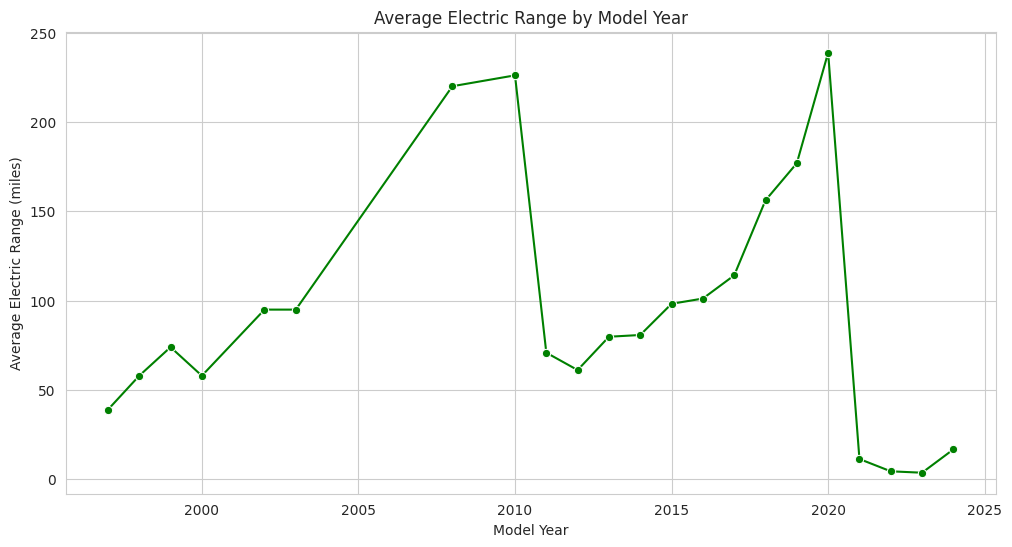

In [17]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

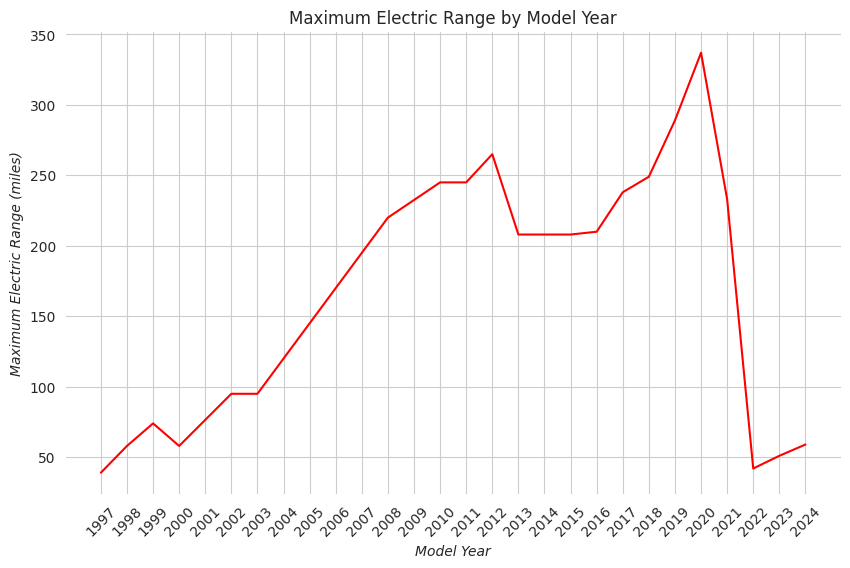

In [18]:
from matplotlib.ticker import FuncFormatter

range_evolution_by_year = ev_data.groupby('Model Year')['Electric Range'].max().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=range_evolution_by_year, marker='', color='red')
plt.title('Maximum Electric Range by Model Year')
plt.xlabel('Model Year', fontstyle='italic')
plt.ylabel('Maximum Electric Range (miles)', fontstyle='italic')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(range(int(range_evolution_by_year['Model Year'].min()), int(range_evolution_by_year['Model Year'].max()) + 1))
plt.xticks(rotation=45)
plt.box(False)
plt.show()

1. Early Market Adoption
Lack of consumer demand: Washington had a growing interest in EVs, as seen on the first graph but in 2010, most of the demand was focused on short-range, affordable vehicles suitable for daily commutes. At the time, EV adoption was driven by early adopters who were often more concerned with sustainability than range.
Affordability over range: Automakers, including Nissan and Chevrolet, introduced vehicles like the Nissan Leaf (with about 73 miles of range in 2011) and the Chevrolet Volt (a PHEV with about 35 miles of electric range). These vehicles prioritized affordability and practicality rather than pushing for long ranges.
2. Limited Charging Infrastructure
Few charging stations: very limited EV charging infrastructure. few public charging stations, automakers were less incentivized to focus on producing high-range EVs which slowed demand for them.
Range anxiety: Without a well-established charging network, potential EV buyers were hesitant about longer-range vehicles. 
3. Battery Technology Development
Battery costs and limitations: Around 2010, EV battery technology was still evolving. Batteries were expensive, had lower energy density, and were heavier, limiting the range that could be provided at a reasonable price. This was a global challenge, but it affected Washington's market as automakers were still in the early stages of pushing battery innovations.
Focus on hybrids and PHEVs: Vehicles like the Chevrolet Volt were popular due to their dual gas-electric systems, making them ideal for Washington drivers who weren’t yet comfortable with fully electric vehicles. As a result, there was less focus on developing high-range electric-only vehicles.
4. Government Policies and Incentives
Early incentives: Washington began offering incentives for EVs around this time, such as tax exemptions for electric vehicles. However, these incentives were still new and primarily focused on encouraging adoption of EVs in general, rather than pushing for technological advances like range improvements.
Environmental goals: Washington has long been a leader in environmental policies, but in 2010, the state's efforts were still in the early stages. Policies that would later drive demand for long-range EVs, such as zero-emission vehicle mandates, were not yet strong enough to push automakers to prioritize longer ranges.
5. Tesla’s Impact
Tesla's limited reach in 2010: Tesla, which would eventually help push EV range boundaries, had only just started delivering its Roadster at that time, and it was a luxury vehicle with limited market penetration in Washington. Tesla’s more mainstream vehicles, like the Model S (released in 2012), hadn’t yet arrived to challenge other automakers on range.
6. Renewable Energy Availability
Hydropower abundance: Washington’s electricity grid is heavily based on renewable energy, particularly hydropower. While this makes EVs highly eco-friendly in the state, the focus in 2010 was more on increasing adoption of EVs rather than increasing their range. The abundant clean energy made short-range, affordable EVs an attractive option for residents focused on reducing their carbon footprint.
Summary:
In Washington State around 2010, the EV market was in its infancy, and the focus was on promoting adoption with affordable, practical, and short-range electric vehicles. Limited charging infrastructure, high battery costs, and early-stage government incentives all contributed to the slower progress in electric range improvements at that time. Range improvements became more of a focus in the later part of the decade as technology advanced and the EV market matured.









## Drop the zeros to have a real average because the cars are all from different years - Evolution of the ranges of specific models over the years.

Now, let’s move forward towards finding the estimated market size of electric vehicles in the United States. I’ll first count the number of EVs registered every year:

In [19]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts.head

<bound method NDFrame.head of Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64>

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

In 2021, there were 19,063 EVs registered.
In 2022, the number increased to 27708 EVs.
In 2023, a significant jump to 57,519 EVs was observed.

To forecast the total number of EVs expected to be registered in 2024 ==> growth rate based approach.

Let's calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:

In [20]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{np.int64(2024): np.float64(79079.2066611501), np.int64(2025): np.float64(119653.95934090775), np.int64(2026): np.float64(181047.21317328632), np.int64(2027): np.float64(273940.7335817853), np.int64(2028): np.float64(414496.9933533305), np.int64(2029): np.float64(627171.2689549965)}


In [21]:
from scipy.optimize import curve_fit
import numpy as np

# Filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# Define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# Fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# Use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# Create a list to display the forecasted values
forecasted_list = [(year, value) for year, value in zip(forecast_years + filtered_years.index.min(), forecasted_values)]

# Print the forecasted values as a list
for year, prediction in forecasted_list:
    print(f"Year: {year}, Predicted EV Registrations: {prediction:.0f}")

Year: 2024, Predicted EV Registrations: 79079
Year: 2025, Predicted EV Registrations: 119654
Year: 2026, Predicted EV Registrations: 181047
Year: 2027, Predicted EV Registrations: 273941
Year: 2028, Predicted EV Registrations: 414497
Year: 2029, Predicted EV Registrations: 627171


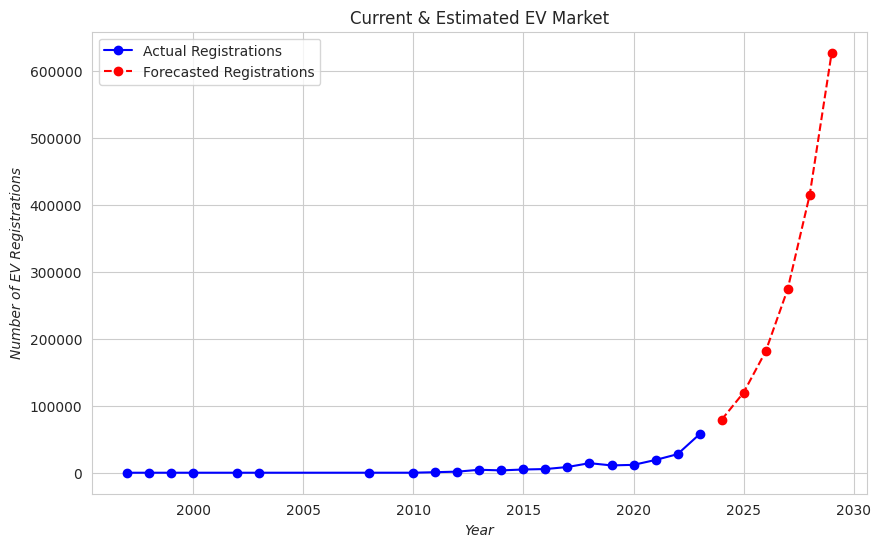

In [22]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(10, 6))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year', fontstyle='italic')
plt.ylabel('Number of EV Registrations', fontstyle='italic')
plt.legend()
plt.grid(True)

plt.show()